# Простое экспоненциальное сглаживание

Модель $$\tilde y_{t+d} = l,$$
где
$$\tilde y_{t+1} = \alpha y_t + (1-\alpha)\tilde y_t$$

### Пример 1: [из документации](https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html#The-Internals)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

%matplotlib inline

data = [
    446.6565,
    454.4733,
    455.663,
    423.6322,
    456.2713,
    440.5881,
    425.3325,
    485.1494,
    506.0482,
    526.792,
    514.2689,
    494.211,
]
index = pd.date_range(start="1996", end="2008", freq="A")
oildata = pd.Series(data, index)

In [13]:
oildata

1996-12-31    446.6565
1997-12-31    454.4733
1998-12-31    455.6630
1999-12-31    423.6322
2000-12-31    456.2713
2001-12-31    440.5881
2002-12-31    425.3325
2003-12-31    485.1494
2004-12-31    506.0482
2005-12-31    526.7920
2006-12-31    514.2689
2007-12-31    494.2110
Freq: A-DEC, dtype: float64

Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


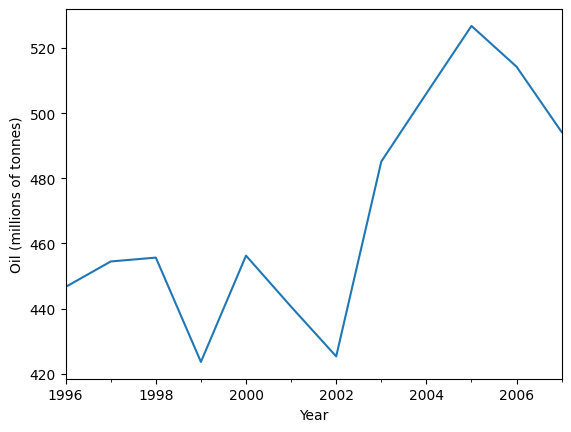

In [2]:
ax = oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

Попробуем три варианта простого экспоненциального сглаживания:

1) c $\alpha = 0.2$

2) с $\alpha = 0.6$

3) определим $\alpha$ автоматически (рекомендованный вариант)

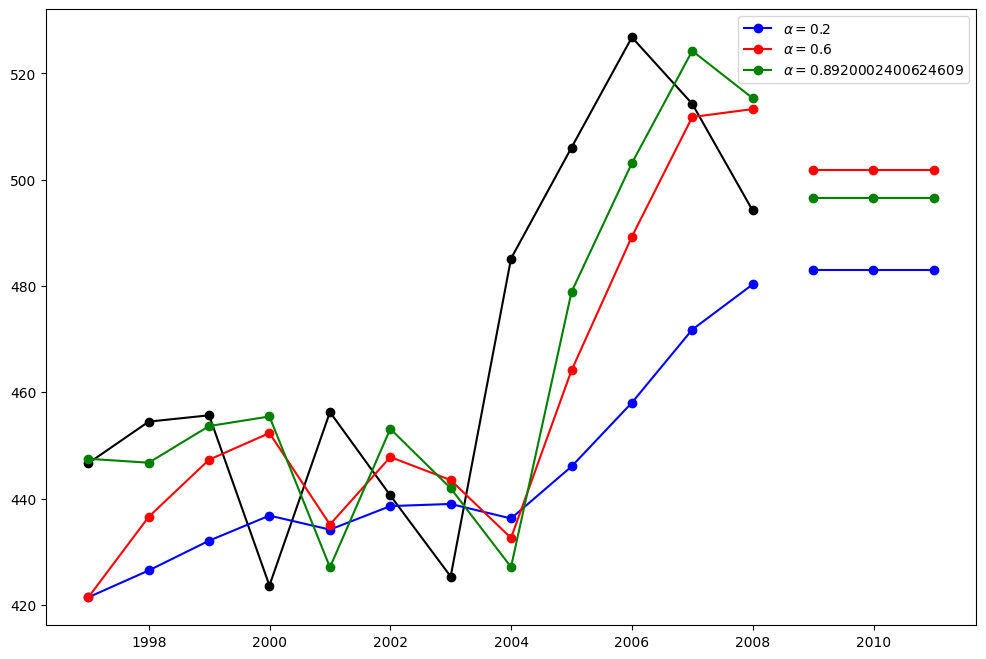

In [3]:
fit1 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")

fit2 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")

fit3 = SimpleExpSmoothing(oildata, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(12, 8))
plt.plot(oildata, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

## Пример 2: временной ряд из ритейла

In [4]:
rt_df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/retail.csv', parse_dates=['Date']).set_index('Date')

<Axes: xlabel='Date'>

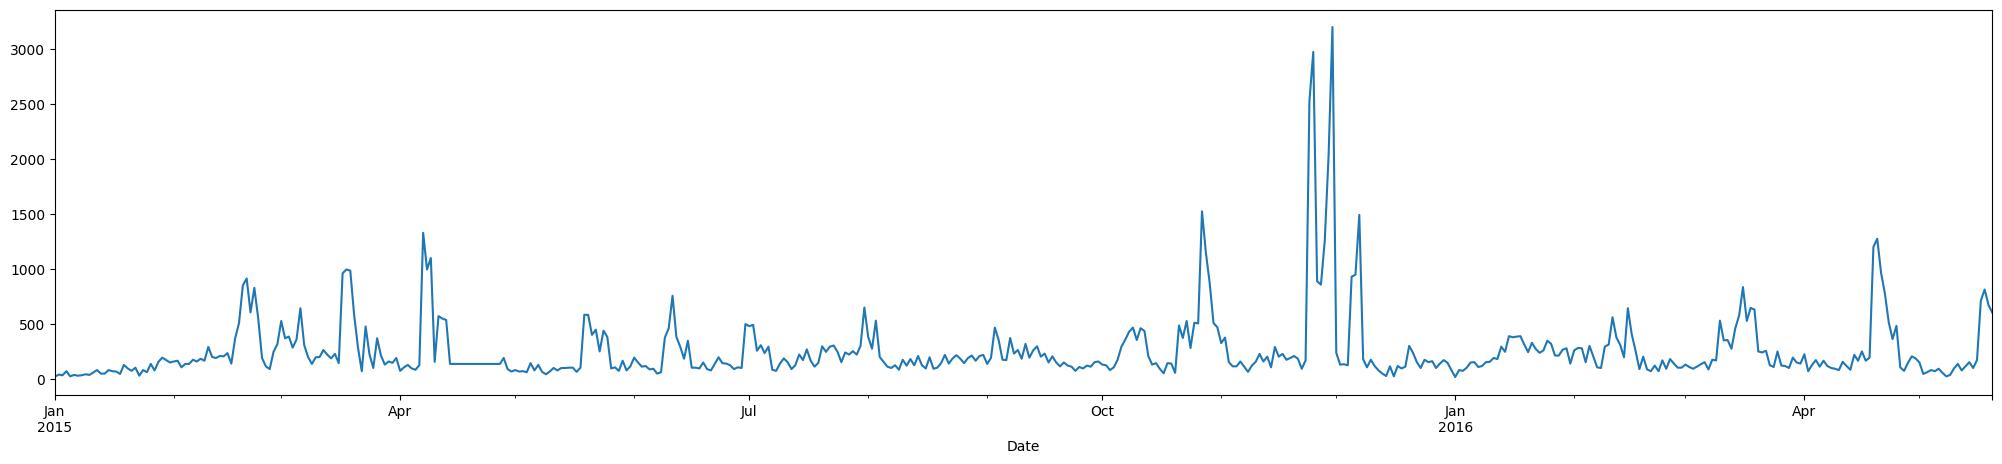

In [5]:
ts = rt_df[(rt_df['Store_id']==1) & (rt_df['SKU_id']==1)]['Demand'].iloc[:-30]

ts.plot(figsize=(25,5))

In [6]:
train = ts.iloc[:-100]
test = ts.iloc[-100:]

In [7]:
fit3 = SimpleExpSmoothing(train, initialization_method="estimated").fit()

fcast3 = fit3.forecast(100).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

/home/opv002/miniconda3/envs/test_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


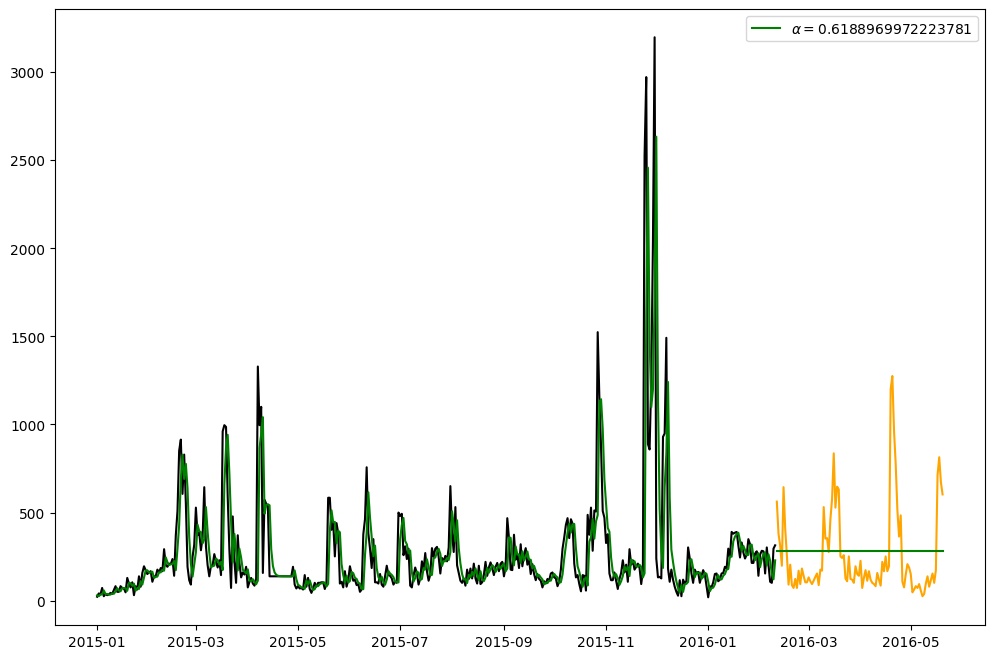

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(train, color="black")
plt.plot(test, color="orange")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, color="green")
plt.legend([line3], [fcast3.name])